# __Интеллектуальный анализ данных__
# Лабораторная работа №1
# Препроцессинг данных

Препроцессинг данных включает в себя широкий круг методов для очистки, выбора и преобразования данных с целью улучшения качества последующего интеллектуального анализа данных.

Программные средства для препроцессинга данных имеются как в библиотеке Pandas, так и основной библиотеке машинного обучения scikit-learn (sklearn).

## Загрузка данных из удаленного файла

Считаем набор данных “Ирисы” из репозитария UCI (http://archive.ics.uci.edu/) различными способами.

1) Считаем данные при помощи библиотеки `urllib.request`, выведем данные на экран и проанализируем форму данных (количество записей и количество признаков):

In [279]:
# данные из репозитария UCI
url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/iris/iris.data"

In [280]:
import urllib.request

data = urllib.request.urlopen(url) # объект типа 'HTTPResponse'

xList = []
for line in data:
    row = line.strip().decode().split(",") # сплит по запятой
    if len(row) > 1:
        xList.append(row)

In [281]:
print('##### Набор данных Ирисы #####')
print("Число строк = ", len(xList))
print("Число столбцов = ", len(xList[1]))
xList

##### Набор данных Ирисы #####
Число строк =  150
Число столбцов =  5


[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

Чтобы использовать считанные данные, нужно преобразовать их в правильный тип.

2) Скопируем файл из репозитария UCI на локальный диск, считаем набор данных при помощи функции `genfromtxt()` библиотеки NumPy и дополнительно рассчитаем средние значения признаков, матрицы ковариаций и корреляций признаков:

In [282]:
from urllib.request import urlopen
from contextlib import closing

# копируем удаленный файл на диск
with closing(urlopen(url)) as u, open("iris.csv", "w") as f:
    f.write(u.read().decode())

In [283]:
import numpy as np

data = np.genfromtxt( "iris.csv", delimiter=",", usecols=(0,1,2,3),
                     dtype=float )
targ = np.genfromtxt( "iris.csv", delimiter=",", usecols=(4),
                     dtype=str )

In [284]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [285]:
targ

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [286]:
iris_mean = np.mean( data, axis=0 ) # средние по столбцам
iris_cov  = np.cov( data.T )
iris_corr = np.corrcoef( data.T )

print( "*** Средние значения:\n", iris_mean )
print( "*** Матрица ковариаций:\n", iris_cov )
print( "*** Матрица корреляций:\n", iris_corr )

*** Средние значения:
 [5.84333333 3.054      3.75866667 1.19866667]
*** Матрица ковариаций:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
*** Матрица корреляций:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3) Считаем теперь набор данных “Ирисы” при помощи пакета Pandas:

In [288]:
import pandas as pd

# считываем данные в объект DataFrame
my_data = pd.read_csv( url, header=None )
my_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [289]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [290]:
my_data.describe() # сводка данных для числовых столбцов

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Плохое качество данных оказывает негативное воздействие на процесс анализа данных. Наиболее часто встречающиеся проблемы включают шум, выбросы, отсутствующие значения и дублирующиеся данные.

## Работа с пропущенными значениями

Достаточно часто в данных отсутствуют (пропущено) одно или несколько значений признаков. Иногда не хватает информации, а иногда некоторые значения не подходят для признаков. Существуют различные подходы для работы с пропущенными (отсутствующими) значениями.

Рассмотрим инструментарий для работы с пропущенными значениями на примере синтетического набора данных.

In [291]:
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3),
                  index=['r1', 'r2', 'r3', 'r4', 'r5'],
                  columns=['c1', 'c2', 'c3'])
df

,c1,c2,c3
r1,0,1,2
r2,3,4,5
r3,6,7,8
r4,9,10,11
r5,12,13,14


Значение `nan` (not-a-number) представляет собой специальное значение, определенное в библиотеке NumPy и предназначенное для кодирования пустых значений:

In [292]:
np.nan, type(np.nan)

(nan, float)

Сделаем в датафрейме ряд изменений:

In [293]:
df['c4'] = np.nan               # новый столбец со значениями NaN
df

,c1,c2,c3,c4
r1,0,1,2,NaN
r2,3,4,5,NaN
r3,6,7,8,NaN
r4,9,10,11,NaN
r5,12,13,14,NaN


In [294]:
# метод (индексатор) `loc` работает с метками строк
df.loc['r6'] = np.arange(15,19) # новая строка со значениями от 15 до 18
df.loc['r7'] = np.nan           # новая строка со значениями NaN
df

,c1,c2,c3,c4
r1,0.0,1.0,2.0,NaN
r2,3.0,4.0,5.0,NaN
r3,6.0,7.0,8.0,NaN
r4,9.0,10.0,11.0,NaN
r5,12.0,13.0,14.0,NaN
r6,15.0,16.0,17.0,18.0
r7,NaN,NaN,NaN,NaN


In [295]:
df['c5'] = np.nan               # новый столбец со значениями NaN
df

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,NaN,NaN
r2,3.0,4.0,5.0,NaN,NaN
r3,6.0,7.0,8.0,NaN,NaN
r4,9.0,10.0,11.0,NaN,NaN
r5,12.0,13.0,14.0,NaN,NaN
r6,15.0,16.0,17.0,18.0,NaN
r7,NaN,NaN,NaN,NaN,NaN


In [296]:
# df['c4']['r1'] = 20           # раньше делали так
df.loc['r1','c4'] = 20          # значение NaN заменяем на 20
df

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,20.0,NaN
r2,3.0,4.0,5.0,NaN,NaN
r3,6.0,7.0,8.0,NaN,NaN
r4,9.0,10.0,11.0,NaN,NaN
r5,12.0,13.0,14.0,NaN,NaN
r6,15.0,16.0,17.0,18.0,NaN
r7,NaN,NaN,NaN,NaN,NaN


Значения `NaN` интерпретируются как неопределенные (пропущенные).

### Поиск (отбор) пропущенных значений

In [297]:
df.isnull() # отбор элементов со значениями NaN

,c1,c2,c3,c4,c5
r1,False,False,False,False,True
r2,False,False,False,True,True
r3,False,False,False,True,True
r4,False,False,False,True,True
r5,False,False,False,True,True
r6,False,False,False,False,True
r7,True,True,True,True,True


In [298]:
df.notnull() # отбор элементов со значениями, отличными от NaN

,c1,c2,c3,c4,c5
r1,True,True,True,True,False
r2,True,True,True,False,False
r3,True,True,True,False,False
r4,True,True,True,False,False
r5,True,True,True,False,False
r6,True,True,True,True,False
r7,False,False,False,False,False


In [299]:
~df.isnull() # можно отобрать элементы и так

,c1,c2,c3,c4,c5
r1,True,True,True,True,False
r2,True,True,True,False,False
r3,True,True,True,False,False
r4,True,True,True,False,False
r5,True,True,True,False,False
r6,True,True,True,True,False
r7,False,False,False,False,False


In [300]:
df.isnull().sum(axis=0) # подсчитываем кол-во NaN в каждом столбце

,0
c1,1
c2,1
c3,1
c4,5
c5,7


In [301]:
df.isnull().sum(axis=1) # подсчитываем кол-во NaN в каждой строке

,0
r1,1
r2,2
r3,2
r4,2
r5,2
r6,1
r7,5


In [302]:
df.count(axis=0) # кол-во значений, отличных от NaN, по каждому столбцу

,0
c1,6
c2,6
c3,6
c4,2
c5,0


### Удаление пропущенных значений

Отберем непропущенные значения в столбце `c4`:

In [303]:
df['c4']

,c4
r1,20.0
r2,NaN
r3,NaN
r4,NaN
r5,NaN
r6,18.0
r7,NaN


In [304]:
df.c4[df.c4.notnull()] # один вариант обращения к столбцу

,c4
r1,20.0
r6,18.0


In [305]:
df['c4'][df['c4'].notnull()] # другой вариант обращения к столбцу

,c4
r1,20.0
r6,18.0


Можно удалить из столбца все значения NaN при помощи метода `dropna()`:

In [306]:
df['c4'].dropna()

,c4
r1,20.0
r6,18.0


Метод `dropna()` возвращает копию с удаленными значениями, при этом  исходный датафрейм (столбец) не изменяется.

In [307]:
df

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,20.0,NaN
r2,3.0,4.0,5.0,NaN,NaN
r3,6.0,7.0,8.0,NaN,NaN
r4,9.0,10.0,11.0,NaN,NaN
r5,12.0,13.0,14.0,NaN,NaN
r6,15.0,16.0,17.0,18.0,NaN
r7,NaN,NaN,NaN,NaN,NaN


Метод `dropna()` при применении к датафрейму удаляет целиком строки, в которых есть по крайней мере одно значение NaN, поэтому из датафрейма будут удалены все строки:

In [308]:
df.dropna()

,c1,c2,c3,c4,c5


При использовании ключа `how='all'` удаляются лишь те строки, в которых все значения являются значениями NaN:

In [309]:
df.dropna(how = 'all')

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,20.0,NaN
r2,3.0,4.0,5.0,NaN,NaN
r3,6.0,7.0,8.0,NaN,NaN
r4,9.0,10.0,11.0,NaN,NaN
r5,12.0,13.0,14.0,NaN,NaN
r6,15.0,16.0,17.0,18.0,NaN


Можно изменить ось, чтобы удалить столбцы со значениями NaN вместо строк:

In [310]:
df.dropna(how='all', axis=1) # удаляем столбец c5

,c1,c2,c3,c4
r1,0.0,1.0,2.0,20.0
r2,3.0,4.0,5.0,NaN
r3,6.0,7.0,8.0,NaN
r4,9.0,10.0,11.0,NaN
r5,12.0,13.0,14.0,NaN
r6,15.0,16.0,17.0,18.0
r7,NaN,NaN,NaN,NaN


Создадим копию датафрейма и заменим в двух ячейках значения NaN на  значения 0:

In [311]:
df2 = df.copy()
df2.loc['r7','c1'] = 0 # df2.loc['r7'].c1=0 или df2.loc['r7']['c1']=0
df2.loc['r7','c3'] = 0 # df2.loc['r7'].c3=0 или df2.loc['r7']['c3']=0
df2

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,20.0,NaN
r2,3.0,4.0,5.0,NaN,NaN
r3,6.0,7.0,8.0,NaN,NaN
r4,9.0,10.0,11.0,NaN,NaN
r5,12.0,13.0,14.0,NaN,NaN
r6,15.0,16.0,17.0,18.0,NaN
r7,0.0,NaN,0.0,NaN,NaN


Удалим столбцы, в которых есть хотя бы одно значение NaN:

In [312]:
df2.dropna(how='any', axis=1)

,c1,c3
r1,0.0,2.0
r2,3.0,5.0
r3,6.0,8.0
r4,9.0,11.0
r5,12.0,14.0
r6,15.0,17.0
r7,0.0,0.0


Оставим столбцы, в которых есть по крайней мере два значения, отличных от NaN:

In [313]:
df2.dropna(thresh=3, axis=1)

,c1,c2,c3
r1,0.0,1.0,2.0
r2,3.0,4.0,5.0
r3,6.0,7.0,8.0
r4,9.0,10.0,11.0
r5,12.0,13.0,14.0
r6,15.0,16.0,17.0
r7,0.0,NaN,0.0


### Заполнение пропущенных значений

Пропущенные значения могут быть заполнены константой:

In [314]:
df.fillna(0)

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,20.0,0.0
r2,3.0,4.0,5.0,0.0,0.0
r3,6.0,7.0,8.0,0.0,0.0
r4,9.0,10.0,11.0,0.0,0.0
r5,12.0,13.0,14.0,0.0,0.0
r6,15.0,16.0,17.0,18.0,0.0
r7,0.0,0.0,0.0,0.0,0.0


Значения NaN не учитываются при вычислении средних значений:

In [315]:
df.mean()

,0
c1,7.5
c2,8.5
c3,9.5
c4,19.0
c5,NaN


Поэтому после замены значений NaN на 0 получаем другие средние значения:

In [316]:
df.fillna(0).mean()

,0
c1,6.428571
c2,7.285714
c3,8.142857
c4,5.428571
c5,0.000000


Пропущенные значения могут быть заполнены соседними значениями в прямом и обратном порядке:

In [317]:
df.c4

,c4
r1,20.0
r2,NaN
r3,NaN
r4,NaN
r5,NaN
r6,18.0
r7,NaN


In [318]:
df.c4.ffill() # прямой порядок

,c4
r1,20.0
r2,20.0
r3,20.0
r4,20.0
r5,20.0
r6,18.0
r7,18.0


In [319]:
df.c4.bfill() # обратный порядок

,c4
r1,20.0
r2,18.0
r3,18.0
r4,18.0
r5,18.0
r6,18.0
r7,NaN


Можно заполнить пропущенные значения для конкретных индексов строк при помощи соответствующего объекта `Series`:

In [320]:
fill_values = pd.Series([100, 101, 102], index=['r1', 'r2', 'r3'])
fill_values

,0
r1,100
r2,101
r3,102


In [321]:
df.c4

,c4
r1,20.0
r2,NaN
r3,NaN
r4,NaN
r5,NaN
r6,18.0
r7,NaN


In [322]:
df.c4.fillna(fill_values)

,c4
r1,20.0
r2,101.0
r3,102.0
r4,NaN
r5,NaN
r6,18.0
r7,NaN


Заполним значения NaN в каждом столбце средним значением этого столбца (где оно может быть вычислено):

In [323]:
df.fillna(df.mean())

,c1,c2,c3,c4,c5
r1,0.0,1.0,2.0,20.0,NaN
r2,3.0,4.0,5.0,19.0,NaN
r3,6.0,7.0,8.0,19.0,NaN
r4,9.0,10.0,11.0,19.0,NaN
r5,12.0,13.0,14.0,19.0,NaN
r6,15.0,16.0,17.0,18.0,NaN
r7,7.5,8.5,9.5,19.0,NaN


Рассмотрим теперь работу с пропущенными значениями на примере набора данных из репозитария UCI с информацией о пациентах с раком груди.

In [324]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'+\
      'breast-cancer-wisconsin/breast-cancer-wisconsin.data'

data = pd.read_csv(url, header=None)
data.columns = ['Sample code', 'Clump Thickness',
                'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1) # удаляем ненужный столбец
print('Число записей = %d' % (data.shape[0]))
print('Число признаков = %d' % (data.shape[1]))
data.head()

Число записей = 699
Число признаков = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


В наборах данных репозитария UCI пропущенные значения часто кодируются как символьная строка '?'. Первая задача состоит в конвертации пропущенных значений в значение NaN.

In [325]:
data = data.replace('?', np.NaN) # заменим '?' на np.NaN

Далее подсчитаем количество пропущенных значений в каждом столбце набора данных.

In [326]:
data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [327]:
print('Число записей = %d' % (data.shape[0]))
print('Число признаков = %d' % (data.shape[1]))

print('Число пропущенных значений:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Число записей = 699
Число признаков = 10
Число пропущенных значений:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Среди всех столбцов только столбец 'Bare Nuclei' содержит пропущенные  значения. Заменим пропущенные значения в столбце 'Bare Nuclei' на медиану столбца при помощи метода `fillna()` (значения до и после замены показаны на подмножестве записей).

In [329]:
data2 = data['Bare Nuclei'].astype(float)

print('До замены отсутствующих значений:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nПосле замены отсутствующих значений:')
print(data2[20:25])

До замены отсутствующих значений:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

После замены отсутствующих значений:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


Вместо замены пропущенных значений можно удалить записи (строки), содержащие пропущенные значения. Для этого можно использовать метод `dropna()`:

In [330]:
print('Число записей в исходных данных = %d' % (data.shape[0]))

data2 = data.dropna()
print('Число записей после удаления отсутствующих значений = %d' % \
      (data2.shape[0]))

Число записей в исходных данных = 699
Число записей после удаления отсутствующих значений = 683


### Выбросы

Выбросами (outliers) называются записи (строки) с характеристиками, которые существенно отличаются от характеристик остальных записей набора данных.

Ниже мы изобразим диаграммы размаха (boxplot) столбцов, чтобы найти столбцы таблицы, которые содержат выбросы. Так как столбец 'Bare Nuclei' идентифицирован Pandas как текстовый (из-за пропущенных  значений, представленных строками '?'), нам придется конвертировать столбец в числовые значения при помощи функции `pd.to_numeric()` или метода `astype()` для того, чтобы использовать диаграмму размаха. В противном случае столбец не будет отображаться на рисунке.

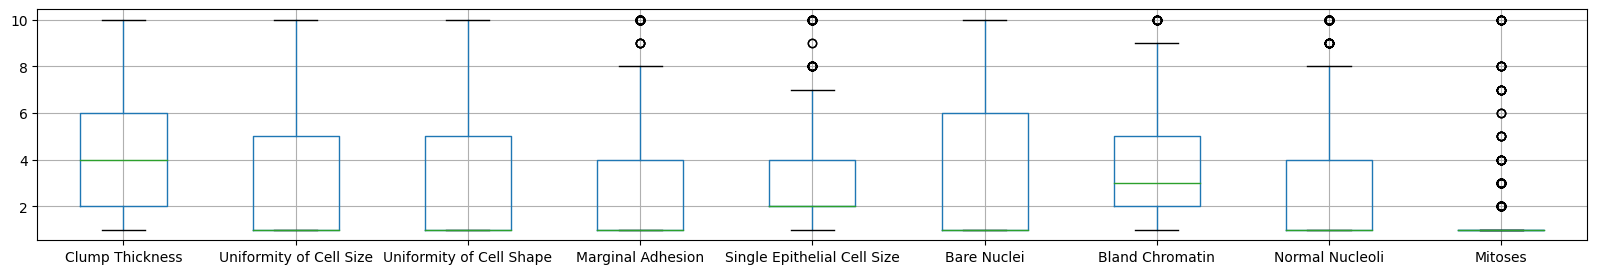

In [331]:
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3)); # rot=45

Диаграммы размаха показывают, что только пять столбцов (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, Mitoses) содержат ненормально большие значения.

Чтобы убрать выбросы, можно посчитать стандартизованную оценку (Z-score) для каждого признака и убрать записи, содержащие атрибуты с ненормально высоким или низким Z-score (например, $Z>3$ или $Z<-3$). Для нормального распределения вероятность отклонения случайной величины от своего математического ожидания более чем на три стандартных отклонения практически равна нулю (правило трех сигм).

Следующий код показывает результаты стандартизации стоблцов с данными. Отсутствующие значения (NaN) не затрагиваются процессом стандартизации.

In [332]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [333]:
Z.mean(), Z.std()

(Clump Thickness               -4.066053e-17
 Uniformity of Cell Size       -1.118165e-16
 Uniformity of Cell Shape      -2.033026e-17
 Marginal Adhesion              1.067339e-16
 Single Epithelial Cell Size    1.321467e-16
 Bare Nuclei                    0.000000e+00
 Bland Chromatin                4.066053e-17
 Normal Nucleoli               -1.016513e-17
 Mitoses                       -8.132106e-17
 dtype: float64,
 Clump Thickness                1.0
 Uniformity of Cell Size        1.0
 Uniformity of Cell Shape       1.0
 Marginal Adhesion              1.0
 Single Epithelial Cell Size    1.0
 Bare Nuclei                    1.0
 Bland Chromatin                1.0
 Normal Nucleoli                1.0
 Mitoses                        1.0
 dtype: float64)

Следующий код показывает результаты удаления строк, для которых $Z>3$ или $Z<-3$. Число 9 соответствует количеству столбцов в Z.

In [334]:
print('Число записей до удаления выбросов = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z >= -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Число записей после удаления выбросов = %d' % (Z2.shape[0]))

Число записей до удаления выбросов = 699
Число записей после удаления выбросов = 632


### Дублирующиеся данные

Некоторые наборы данных, особенно полученные слиянием данных из нескольких источников, могут содержать дублирующиеся записи.

Создадим синтетический датафрейм с дублирующимися строками:

In [335]:
data_dup = pd.DataFrame({'c1': ['x'] * 3 + ['y'] * 4,
                         'c2': [1, 1, 2, 3, 3, 4, 4]})
data_dup

,c1,c2
0,x,1
1,x,1
2,x,2
3,y,3
4,y,3
5,y,4
6,y,4


Определим, какие строки являются дублирующимися, то есть какие строки уже ранее встречались в датафрейме:

In [336]:
data_dup.duplicated()

,0
0,False
1,True
2,False
3,False
4,True
5,False
6,True


Удалим дублирующиеся записи (строки), каждый раз оставляя первую из дублирующихся записей:

In [337]:
data_dup.drop_duplicates()

,c1,c2
0,x,1
2,x,2
3,y,3
5,y,4


Удалим дублирующиеся записи, каждый раз оставляя последнюю из дублирующихся записей:

In [338]:
data_dup.drop_duplicates(keep='last')

,c1,c2
1,x,1
2,x,2
4,y,3
6,y,4


Добавим новый столбец и отследим дублирующиеся записи:

In [339]:
data_dup['c3'] = range(7)
data_dup

,c1,c2,c3
0,x,1,0
1,x,1,1
2,x,2,2
3,y,3,3
4,y,3,4
5,y,4,5
6,y,4,6


In [340]:
data_dup.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False


Теперь дублирующихся записей вообще нет, так как в столбце `c3` все значения отличаются. Но можно найти и удалить дублирующиеся записи с учетом значений в столбцах `c1` и `c2`, результаты будут выглядеть так:

In [341]:
data_dup.drop_duplicates(['c1', 'c2'])

,c1,c2,c3
0,x,1,0
2,x,2,2
3,y,3,3
5,y,4,5


Подсчитаем дублирующиеся записи в наборе данных с информацией о пациентах:

In [342]:
dups = data.duplicated()
print('Число дублирующихся записей = %d' % (dups.sum()))
data.loc[[11,28]]

Число дублирующихся записей = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


Метод `duplicated()` возвращает булевский массив, который показывает является ли запись дубликатом какой-либо предыдущей записи в таблице. Результат означает, что в наборе данных пациентов с раком груди имеется 236 дублирующихся записей. Например, строка с индексом 11 имеет те же значения признаков, что и строка с индексом 28.

Хотя дублирующиеся записи могут соответствовать данным различных пациентов, допустим, что дублирующиеся записи  соответствуют одному и тому же пациенту и удалим их:

In [343]:
print('Число записей до удаления дубликатов = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Число записей после удаления дубликатов = %d' % (data2.shape[0]))

Число записей до удаления дубликатов = 699
Число записей после удаления дубликатов = 463


## Трансформация (преобразование) данных

#### Замена значений

1) метод `map()` (для объектов Series)

Создадим два объекта Series для иллюстрации процесса сопоставления значений:

In [344]:
x = pd.Series({"r1": 1, "r2": 2, "r3": 3})
x

,0
r1,1
r2,2
r3,3


In [345]:
y = pd.Series({1: "a", 2: "b", 3: "c"})
y

,0
1,a
2,b
3,c


Сопоставим индексам объекта  `x` значения объекта `y`:

In [346]:
x.map(y)

,0
r1,a
r2,b
r3,c


Если между значением объекта `y` и индексной меткой объекта `x` не будет найдено соответствие, будет выдано значение NaN:

In [347]:
y.loc[1:2]

,0
1,a
2,b


In [348]:
x.map(y.loc[1:2])

,0
r1,a
r2,b
r3,NaN


2) метод `replace()`

In [349]:
x.replace(2,2024) # заменяем 2 на 2024

,0
r1,1
r2,2024
r3,3


In [350]:
x.replace([1,3],[111,333]) # заменяем значения 1, 3 на 111, 333

,0
r1,111
r2,2
r3,333


In [351]:
x.replace({1:2021, 2:2024}) # замена по словарю

,0
r1,2021
r2,2024
r3,3


#### Применение функций к данным

1) метод `apply()` применяется к строкам/столбцам

In [352]:
s = pd.Series(np.arange(0, 5))
s

,0
0,0
1,1
2,2
3,3
4,4


In [353]:
s.apply(lambda v: v * 3)

,0
0,0
1,3
2,6
3,9
4,12


Создадим датафрейм, чтобы проиллюстрировать применение операции суммирования к каждому столбцу:

In [354]:
df = pd.DataFrame(np.arange(12).reshape(4, 3),
                  columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Вычислим сумму элементов в каждом столбце:

In [355]:
df.apply(lambda col: col.sum())

,0
a,18
b,22
c,26


Вычислим сумму элементов в каждой строке:

In [356]:
df.apply(lambda row: row.sum(), axis=1)

,0
0,3
1,12
2,21
3,30


Создадим столбец `d` путем умножения столбцов `a` и `b`:

In [357]:
df['d'] = df.apply(lambda row: row.a * row.b, axis=1)
df

,a,b,c,d
0,0,1,2,0
1,3,4,5,12
2,6,7,8,42
3,9,10,11,90


А теперь получим столбец `r` путем сложения столбцов `c` и `d`:

In [358]:
df['r'] = df.apply(lambda row: row.c + row.d, axis=1)
df

,a,b,c,d,r
0,0,1,2,0,2
1,3,4,5,12,17
2,6,7,8,42,50
3,9,10,11,90,101


2) метод `map()` применяется ко всем элементам датафрейма:

In [359]:
df.map(lambda x: np.exp(x)/10)

,a,b,c,d,r
0,0.100000,0.271828,0.738906,1.000000e-01,7.389056e-01
1,2.008554,5.459815,14.841316,1.627548e+04,2.415495e+06
2,40.342879,109.663316,298.095799,1.739275e+17,5.184706e+20
3,810.308393,2202.646579,5987.414172,1.220403e+38,7.307060e+42


### Стандартизация и нормализация признака

Стандартизацией случайной величины $X$ называют ее линейное преобразование, приводящее к случайной величине с математическим ожиданием 0 и стандартным отклонением 1:

$\tilde{X}=\frac{X-\mathbb{E}\left[X\right]}{\sqrt{\mathbb{V}\left[X\right]}},$

где $\mathbb{E}$ – операция вычисления математического ожидания, $\mathbb{V}$ – операция вычисления дисперсии.

Стандартизация набора данных является существенным условием для применения многих алгоритмов машинного обучения, а именно, алгоритмы дают приемлемый результат, только если отдельные признаки распределены примерно как стандартные нормальные величины (с нулевым матожиданием и единичной дисперсией).

Для стандартизации признаков набора данных может быть использована функция `scale()` из модуля `preprocessing`:

In [360]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


Стандартизованный набор данных имеет признаки с нулевыми средними и единичной дисперсией:

In [361]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


Также модуль preprocessing содержит класс `StandardScaler`, который позволяет сохранить математическое ожидание и стандартное отклонение обучающей выборки и затем применять то же преобразование к другим выборкам.

Альтернативным вариантом нормализации является масштабирование признака между заданным минимальным и максимальным значениями (нормализация). Этот эффект может быть достигнут при помощи функций `MinMaxScaler()` или `MaxAbsScaler()`:

In [362]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Функция `MaxAbsScaler()` используется аналогично, но масштабирует данные в диапазон $\left[-1,\,1\right]$.

### Семплирование данных

Семплирование (от англ. sample — выборка), или методы управления выборкой данных, – это подход, направленный на:

1. сокращение объема данных для анализа данных и масштабирования алгоритмов для приложений с большими данными

2. количественную оценку неопределенностей из-за различного распределения данных

Существуют различные методы выборки данных, такие как выборка без замены, когда каждый выбранный экземпляр удаляется из набора данных, и выборка с заменой, где каждый выбранный экземпляр не удаляется, что позволяет выбирать его более одного раза.

В примере ниже мы применим выборку с заменой и без замены с набору данных пациентов с раком груди.

Выведем первые пять записей набора:

In [363]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Далее данные для выборки размера 3 (без замены) выбираются случайным образом из исходных данных.

In [364]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
102,4,1,2,1,2,1,3,1,1,2
120,1,1,2,2,2,1,3,1,1,2
401,3,1,1,1,2,1,1,1,1,2


В следующем примере мы случайным образом выбираем 1% данных (без замены) и выводим выбранные записи. Параметр `random_state` задает начальное значение для генератора случайных чисел.

In [365]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


Наконец, выполним выборку с заменой размером, равным 1% всех данных. Можно увидеть повторяющиеся записи в выборке, если увеличить ее размеры.

In [366]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


### Дискретизация данных

Дискретизация – это этап препроцессинга, который часто используется при преобразовании непрерывного признака в категориальный.

Пример ниже иллюстрирует два простых, но часто применяемых метода дискретизации (равной ширины,  равных частот) для признака 'Clump Thickness' набора данных пациентов с раком груди.

Вначале нарисуем гистограмму, которая показывает распределение значений признака. Метод `value_counts()` также может быть использован, чтобы подсчитать частоты каждого значения признака.

In [367]:
%matplotlib inline
import matplotlib.pyplot as plt

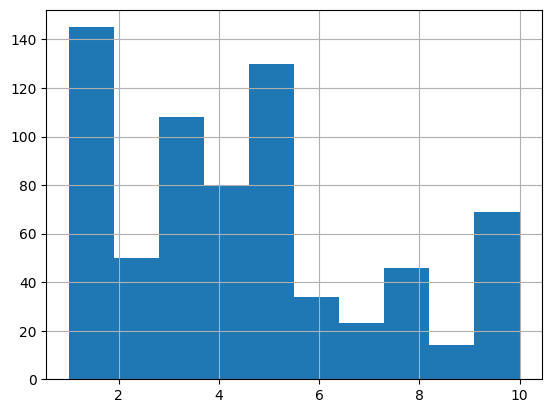

,count
Clump Thickness,
5,130
3,108
6,34
4,80
8,46
1,145
2,50
7,23
10,69


In [368]:
data['Clump Thickness'].hist(bins=10)
plt.show()
data['Clump Thickness'].value_counts(sort=False)

При использовании метода равной ширины можно задействовать функцию `cut()`, чтобы дискретизировать признак в 4 бина, имеющих равную ширину. Метод `value_counts()` может быть использован для определения числа записей в каждом из бинов.

In [369]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

,count
Clump Thickness,
"(0.991, 3.25]",303
"(3.25, 5.5]",210
"(5.5, 7.75]",57
"(7.75, 10.0]",129


При использовании метода равных частот можно задействовать функцию `qcut()` для разделения значений признака на 4 бина, имеющих примерно равное число записей.

In [370]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

,count
Clump Thickness,
"(0.999, 2.0]",195
"(2.0, 4.0]",188
"(4.0, 6.0]",164
"(6.0, 10.0]",152


Дискретизация также возможна при помощи средств библиотеки scikit-learn.

### Кодирование категориальных признаков

В большинстве наборов данных присутствуют категориальные признаки, которые содержат значения в текстовом формате. Примерами являются цвета (“Red”, “Green”, “Yellow”, “Blue”), размеры (“Small”, “Medium”, “Large”, “Extra Large”), географические обозначения (страны, города и т.п.). Независимо от назначения категориальных признаков возникает вопрос, как использовать категориальные признаки при анализе данных. Многие алгоритмы машинного обучения поддерживают категориальные значения без необходимости каких-либо манипуляций с данными, однако есть и такие алгоритмы, которые требуют преобразования текстовых значений в числовые для дальнейшей обработки.

#### Набор данных

Рассмотрим набор данных Automobile из репозитария UCI, содержащий как категориальные, так и непрерывные признаки.

Импортируем данные, выполняя попутно обработку пропущенных значений:

In [371]:
# определяем метки столбцов
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location",
    "wheel_base", "length", "width", "height", "curb_weight",
    "engine_type", "num_cylinders", "engine_size", "fuel_system",
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
    "city_mpg", "highway_mpg", "price"]
# считываем CSV файл и конвертируем значения "?" в NaN
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/"+\
      "autos/imports-85.data"
df = pd.read_csv(url, header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Чтобы понять, с какими типами данным мы имеем дело, рассмотрим свойство

In [372]:
df.dtypes

,0
symboling,int64
normalized_losses,float64
make,object
fuel_type,object
aspiration,object
num_doors,object
body_style,object
drive_wheels,object
engine_location,object
wheel_base,float64


Так как нас интересуют только категориальные признаки, оставим в наборе столбцы с типом `“object”`. Pandas содержит удобный метод `select_dtypes()`, который можно использовать, чтобы оставить в наборе только столбцы с типом `“object”` (категориальные признаки):

In [373]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Построенный набор содержит несколько строк с пропущенными значениями, которые нужно заполнить:

In [374]:
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


В наборе наиболее часто встречается значение "four" (4 двери):

In [375]:
obj_df["num_doors"].value_counts()

,count
num_doors,
four,114
two,89


Для простоты заполним пропущенные значения этим значением:

In [376]:
obj_df = obj_df.fillna({"num_doors": "four"})
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system


Теперь набор не содержит пропущенных значений и мы можем приступить к кодированию категориальных значений.

#### Замена значений признаков

В двух столбцах набора данных текстовые значения представляют собой числа, а именно, число цилиндров в двигателе и число дверей в автомобиле.

Признак "num_cylinders" принимает 7 значений, которые легко преобразуются в целые числа:

In [377]:
obj_df["num_cylinders"].value_counts()

,count
num_cylinders,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


Метод `replace()` из Pandas имеет множество опций, в частности, опцию словаря, содержащего названия столбцов и словари для отображения старых значений в новые значения.

Словарь для преобразования признаков "num_doors" и "num_cylinders" в числовые значения задается следующим образом:

In [378]:
cleanup_nums = {"num_doors": {"four": 4, "two": 2},
    "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
    "two": 2, "twelve": 12, "three":3 }}

Для преобразования признаков в числовые значения выполним код:

In [379]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


Pandas автоматически преобразует тип признаков в числовой (int64):

In [380]:
obj_df.dtypes

,0
make,object
fuel_type,object
aspiration,object
num_doors,int64
body_style,object
drive_wheels,object
engine_location,object
engine_type,object
num_cylinders,int64
fuel_system,object


Описанный подход работает в тех случаях, когда имеется понятный способ интерпретации текстовых значений как числовых.

#### Кодирование меток

Кодирование меток (label encoding) – это способ конвертации значений в столбцах в числа.

Например, столбец body_style содержит 5 различных значений. Можно закодировать их так:

    convertible -> 0  
    hardtop -> 1  
    hatchback -> 2  
    sedan -> 3  
    wagon -> 4  

Можно использовать Pandas, чтобы преобразовать столбец в категорию (категория – это тип данных в Pandas, принимающий несколько значений), а потом использовать значения категории для кодирования меток:

In [381]:
obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

,0
make,object
fuel_type,object
aspiration,object
num_doors,int64
body_style,category
drive_wheels,object
engine_location,object
engine_type,object
num_cylinders,int64
fuel_system,object


In [382]:
obj_df

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,ohc,4,mpfi
201,volvo,gas,turbo,4,sedan,rwd,front,ohc,4,mpfi
202,volvo,gas,std,4,sedan,rwd,front,ohcv,6,mpfi
203,volvo,diesel,turbo,4,sedan,rwd,front,ohc,6,idi


Далее можно присвоить закодированные значения признака новому столбцу "body_style_cat" используя свойство `cat.codes`:

In [383]:
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes
obj_df[['body_style','body_style_cat']].head()

,body_style,body_style_cat
0,convertible,0
1,convertible,0
2,hatchback,2
3,sedan,3
4,sedan,3


Особенностью этого подхода является то, что появляется возможность использовать преимущества категорий Pandas (компактность данных, возможность упорядочения, поддержка визуализации), при этом категории могут быть легко конвертированы в числовые значения для дальнейшего анализа.

#### Прямое кодирование (One Hot Encoding)

Кодирование меток имеет преимущество в виде простоты реализации и недостаток, состоящий в том, что числовое значение может быть некорректно интерпретировано алгоритмами машинного обучения. Например, значение 0, очевидно, меньше значения 2, но соответствует ли эта зависимость реальной ситуации для текстовых значений?

Альтернативный подход (прямое кодирование) состоит в том, чтобы конвертировать каждую категорию в новый столбец, принимающий значения 1 или 0 (True/False). Преимуществом этого подхода является то, что между категориальными значениями не устанавливаются несуществующие связи, а недостатком – что в наборе данных появляются дополнительные столбцы.

Pandas поддерживает этот подход в функции `get_dummies()`, которая создает новые столбцы вида “столбец_значение”.

Рассмотрим пример для столбца drive_wheels со значениями 4wd , fwd, rwd. Используя `get_dummies()` мы конвертируем этот столбец в три столбца со значениями 1 или 0, соответствующими правильному значению исходного признака (столбца):

In [384]:
pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,False,False,True
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,False,False,True
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,False,False,True
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,False,True,False
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,True,False,False


Столбец "drive_wheels" пропал, при этом новый набор данных содержит три новых столбца:

• drive_wheels_4wd  
• drive_wheels_rwd  
• drive_wheels_fwd  

В функцию `get_dummies()` можно передать несколько столбцов с категориальными признаками, а также передать префиксы для именования новых столбцов с целью упростить последующий анализ данных:

In [385]:
pd.get_dummies(obj_df, columns=["body_style", "drive_wheels"], \
               prefix=["body", "drive"]).head()

,make,fuel_type,aspiration,num_doors,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,True,False,False,False,False,False,False,True
1,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,True,False,False,False,False,False,False,True
2,alfa-romero,gas,std,2,front,ohcv,6,mpfi,2,False,False,True,False,False,False,False,True
3,audi,gas,std,4,front,ohc,4,mpfi,3,False,False,False,True,False,False,True,False
4,audi,gas,std,4,front,ohc,5,mpfi,3,False,False,False,True,False,True,False,False


Прямое кодирование является очень полезным инструментом, однако может приводить к резкому увеличению числа столбцов в наборе, если категориальные признаки имеют большое число различных значений.

#### Двоичное кодирование, управляемое пользователем

В зависимости от особенностей набора данных можно использовать различные комбинации кодирования меток и прямого кодирования, которые в наибольшей степени соответствуют целям дальнейшего анализа.

Для иллюстрации двоичного кодирования, управляемого пользователем (custom binary encoding), рассмотрим следующий пример. В наборе данных имеется столбец engine_type (тип двигателя), который содержит несколько различных значений:

In [386]:
obj_df["engine_type"].value_counts()

,count
engine_type,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


Допустим, что требуется выделить в отдельную группу все двигатели с верхней камерой (Overhead Cam или OHC). Другими словами, различные версии OHC эквивалентны для анализа. В это случае можно использовать свойство `str` и функцию `np.where`, чтобы создать новый столбец как индикатор того, что двигатель автомобиля имеет тип OHC.

In [387]:
obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)
obj_df["OHC_Code"].value_counts()

,count
OHC_Code,
1,189
0,16


В результате получаем набор данных, включающий столбец OHC_Code (показываем в наборе только три столбца):

In [388]:
obj_df[["make", "engine_type", "OHC_Code"]].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


Данный подход является по-настоящему полезным, если имеется возможность консолидировать бинарные значения (да/нет) в новом столбце.

#### Возможности кодирования в библиотеке Scikit-Learn

Библиотека scikit-learn также содержит функцонал для кодирования текстовых признаков.

Например, чтобы кодировать метки для производителей автомобиля, используем объект `LabelEncoder` и метод `fit_transform()` для столбца с данными:

In [389]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])
obj_df[["make", "make_code"]].head(11)

,make,make_code
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


Scikit-learn также поддерживает бинарное кодирование при помощи объекта `LabelBinarizer`. Можно использовать процедуру, аналогичную приведенной выше, чтобы преобразовать данные, но требуются некоторые дополнительные шаги.

In [390]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


На следующем шаге нужно включить эти данные в исходный набор данных.

## Отбор признаков

Набор признаков, используемых для обучения модели, оказывает значительное влияние на качество результатов. Присутствие в наборе данных малоинформативных признаков приводит к снижению точности многих моделей, особенно моделей регрессии.

Отбор признаков (feature selection) – это процесс выбора признаков, обеспечивающий более высокое качество модели машинного обучения.

Отбор признаков перед построением модели обеспечивает следующие преимущества:

• Уменьшение переобучения. Чем меньше избыточных данных, тем меньше возможностей для модели принимать решения на основе «шума».

• Повышение точности. Чем меньше противоречивых данных, тем выше точность.

• Сокращение времени обучения. Чем меньше данных, тем быстрее обучается модель.

Будем работать с набором данных, содержащим информацию о качество вина.

### Удаление признаков с низкой дисперсией

Простейшим подходом к отбору признаков является исключение признаков с низкой дисперсией. Если дисперсия признака равна нулю, то признак для всех записей имеет одно и то же значение и может не приниматься во внимание при анализе данных. Если дисперсия признака близка к нулю, то признак принимает значения, близкие к некоторому (среднему) значению и, скорее всего, является несущественным.

В качестве примера рассмотрим гипотетический набор данных с булевыми признаками и допустим, что мы хотим удалить все признаки, в которых нули или единицы составляют более чем 80% значений. Булевы признаки могут быть интепретированы как случайные величины с распределением Бернулли, имеющие дисперсию

$V\left[X\right]=p\,\left(1-p\right),$

поэтому при отборе признаков можем использовать пороговое значение $0.8\,(1-0.8)$:

In [391]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1],
     [0, 1, 0],
     [1, 0, 0],
     [0, 1, 1],
     [0, 1, 0],
     [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

Как и ожидалось, метод `VarianceThreshold` удалил первый столбец, для которого вероятность нулевого значения $p=\frac{5}{6}>0.8$.

### Одномерный отбор признаков

Признаки, имеющие наиболее выраженную взаимосвязь с целевой переменной, могут быть отобраны с помощью статистических критериев. Библиотека scikit-learn содержит класс `SelectKBest`, реализующий одномерный отбор признаков (univariate feature selection). Этот класс можно применять совместно с различными статистическими критериями для отбора заданного количества признаков.

В примере ниже используется критерий хи-квадрат (chi-squared test) для неотрицательных признаков, чтобы отобрать 4 лучших признака.

In [392]:
# отбор признаков при помощи одномерных статистических тестов
from sklearn.feature_selection import SelectKBest,chi2

# загрузка данных - качество вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/"+\
      "wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=";")
print("\nИсходный набор данных:\n",df.head())
array = df.values
X = array[:,0:11] # входные переменные (11 признаков)
Y = array[:,11]   # выходная переменная - качество (оценка между 0 и 10)

# отбор признаков
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
df_new = df.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Исходный набор данных:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8       

Мы видим оценки для каждого признака и 4 отобранных признака (с наивысшими оценками): volatile acidity, free sulfur dioxide, total sulfur dioxide и alcohol.

Если выходная (зависимая) переменная представляет собой класс, то можно использовать статистические критерии `chi2` или `f_classif`. Если выходная (зависимая) переменная представляет собой признак, принимающий непрерывные значения, то следует использовать статистический критерий `f_regression`.

### Отбор на основе важности признаков

Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

В представленном ниже примере мы обучаем классификатор `ExtraTreesClassifier`, чтобы с его помощью определить важность признаков.

In [393]:
# важность признаков с классификатором Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# загрузка данных - качество вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/"+\
      "wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

array = df.values
X = array[:,0:11] # входные переменные (11 признаков)
Y = array[:,11]   # выходная переменная - качество (оценка между 0 и 10)

# отбор признаков
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.0773516  0.09652036 0.08139449 0.07832479 0.07675897 0.07480238
 0.10090534 0.08245251 0.07506839 0.10269663 0.15372455]


Мы получили оценки для каждого признака. Чем больше значение оценки, тем важнее признак. Таким образом, согласно данному методу отбора, двумя наиболее важными признаками являются два последних признака (total sulfur dioxide и sulphates).

### Метод главных компонент

Метод главных компонент (principal component analysis, PCA) позволяет уменьшить размерность данных с помощью преобразования на основе линейной алгебры. Пользователь может задать требуемое количество измерений (главных компонент) в результирующих данных.

Прочитаем набор данных "Ирисы" и сократим его размерность до двух:

In [394]:
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/"+\
      "iris/iris.data"

# считываем данные в объект data frame
my_data = pd.read_csv( url, header=None, usecols=(0,1,2,3) )

pca = PCA(n_components=2)

pcad = pca.fit_transform(my_data) # numpy array

print( "*** Первые 5 строк данных:" )
for x in range(0,5):
  print( pcad[x] )

print( "*** Дисперсии компонент:\n", pca.explained_variance_ratio_ )

*** Первые 5 строк данных:
[-2.68420713  0.32660731]
[-2.71539062 -0.16955685]
[-2.88981954 -0.13734561]
[-2.7464372  -0.31112432]
[-2.72859298  0.33392456]
*** Дисперсии компонент:
 [0.92461621 0.05301557]


Определим уровень объясняемой дисперсии для различных значений параметра `n_components`:

In [395]:
for r in range(1,5):
  pca = PCA( n_components = r )
  pca.fit( my_data )
  print( "r =",r,"\tДисперсия =",
        sum(pca.explained_variance_ratio_)*100,"%" )

r = 1 	Дисперсия = 92.46162071742684 %
r = 2 	Дисперсия = 97.76317750248035 %
r = 3 	Дисперсия = 99.48169145498102 %
r = 4 	Дисперсия = 100.00000000000003 %


В примере ниже выделим 3 главных компоненты с помощью PCA.

In [396]:
# загрузка данных - качество красного вина
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/"+\
      "wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

array = df.values
X = array[:,0:11] # входные переменные (11 признаков)

# главные компоненты
pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# результаты
print("Объясняемая дисперсия:", sum(fit.explained_variance_ratio_)*100)
print(features[0:5,:])

Объясняемая дисперсия: 99.75344527989411
[[-13.22490501  -2.02389981  -1.12682053]
 [ 22.03772361   4.40832155  -0.31037799]
 [  7.16267333  -2.50146086  -0.5818683 ]
 [ 13.43006283  -1.95112215   2.63403954]
 [-13.22490501  -2.02389981  -1.12682053]]


Результат преобразования (3 главных компоненты) совсем не похож на исходные данные и содержит отрицательные значения.

## Вычисления с данными датафрейма

Чтобы получить сводку статистик для числовых столбцов датафрейма, можно воспользоваться методом `describe()`:

In [397]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Можно вычислить сводку статистик для отдельного столбца, например, `fixed acidity`:

In [398]:
df['fixed acidity'].describe()

,fixed acidity
count,1599.000000
mean,8.319637
std,1.741096
min,4.600000
25%,7.100000
50%,7.900000
75%,9.200000
max,15.900000


Полезная информация о датафрейме также может быть получена при помощи метода `info()`:

Для нечислового столбца получаем при помощи `describe()` такую статистику:

In [399]:
obj_df.make.describe()

,make
count,205
unique,22
top,toyota
freq,32


Можно также вычислить нормализованные частоты:

In [400]:
obj_df.make.value_counts(normalize=True)

,proportion
make,
toyota,0.156098
nissan,0.087805
mazda,0.082927
mitsubishi,0.063415
honda,0.063415
volkswagen,0.058537
subaru,0.058537
peugot,0.053659
volvo,0.053659


Чтобы определить минимальные значения для столбцов числового датафрейма, можно воспользоваться методом `min()`:

In [401]:
df.min()

,0
fixed acidity,4.60000
volatile acidity,0.12000
citric acid,0.00000
residual sugar,0.90000
chlorides,0.01200
free sulfur dioxide,1.00000
total sulfur dioxide,6.00000
density,0.99007
pH,2.74000
sulphates,0.33000


Индексы для минимальных значений определяются при помощи метода `idxmin()`:

In [402]:
df.idxmin()

,0
fixed acidity,45
volatile acidity,948
citric acid,0
residual sugar,1017
chlorides,836
free sulfur dioxide,530
total sulfur dioxide,915
density,1017
pH,151
sulphates,170


Для максимальных значений используются методы `max()` и `idxmax()`.

Для вычисления минимальных/максимальных значений по строкам применяется ключ `axis=1`:

In [403]:
df.max(axis=1)

,0
0,34.0
1,67.0
2,54.0
3,60.0
4,34.0
...,...
1594,44.0
1595,51.0
1596,40.0
1597,44.0


Для вычисления средних значений и медиан используются методы `mean()` и `median()`:

In [404]:
df.median()

,0
fixed acidity,7.90000
volatile acidity,0.52000
citric acid,0.26000
residual sugar,2.20000
chlorides,0.07900
free sulfur dioxide,14.00000
total sulfur dioxide,38.00000
density,0.99675
pH,3.31000
sulphates,0.62000


In [405]:
df.mean(axis=1).head()

,0
0,6.211983
1,10.254567
2,8.308250
3,9.296083
4,6.211983


Для вычисления дисперсии и стандартного отклонения используем методы `var()` и `std()`:

In [406]:
df.var()

,0
fixed acidity,3.031416
volatile acidity,0.032062
citric acid,0.037947
residual sugar,1.987897
chlorides,0.002215
free sulfur dioxide,109.414884
total sulfur dioxide,1082.102373
density,0.000004
pH,0.023835
sulphates,0.028733


In [407]:
df.std(axis=1).tail()

,0
1594,14.218624
1595,16.818508
1596,12.845698
1597,14.206277
1598,12.038934


Для вычисления ковариации и корреляции между двумя столбцами можно использовать методы `cov()` и `corr()`:

In [408]:
df['fixed acidity'].cov(df['volatile acidity'])

-0.07985141683514649

In [409]:
df.alcohol.corr(df.quality)

0.47616632400113584

Также можно вычислить матрицы ковариаций и корреляций признаков:

In [410]:
df.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


In [411]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Чтобы отобрать из датафрейма со столбцами разных типов только числовые столбцы, можно использовать метод `select_dtypes()`:

In [412]:
obj_df.select_dtypes(include=np.number)

,num_doors,num_cylinders,body_style_cat,OHC_Code,make_code
0,2,4,0,1,0
1,2,4,0,1,0
2,2,6,2,1,0
3,4,4,3,1,1
4,4,5,3,1,1
...,...,...,...,...,...
200,4,4,3,1,21
201,4,4,3,1,21
202,4,6,3,1,21
203,4,6,3,1,21


## Визуализация данных

Основной библиотекой визуализации данных является библиотека Matplotlib. Библиотека Pandas имеет встроенный интерфейс для обращения к Matplotlib.

Загрузим с локального диска два датасета с данными:

In [413]:
sp500 = pd.read_csv("/content/drive/MyDrive/University/Viti IV/Интеллектуальный анализ данных/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price',
                             'Book Value', 'Market Cap',
                             'Dividend Yield'])
sp500

,Sector,Price,Dividend Yield,Book Value,Market Cap
Symbol,,,,,
MMM,Industrials,141.14,2.12,26.668,92.345
ABT,Health Care,39.60,1.82,15.573,59.477
ABBV,Health Care,53.95,3.02,2.954,85.784
ACN,Information Technology,79.79,2.34,8.326,50.513
ACE,Financials,102.91,2.21,86.897,34.753
...,...,...,...,...,...
YHOO,Information Technology,35.02,NaN,12.768,35.258
YUM,Consumer Discretionary,74.77,1.93,5.147,33.002
ZMH,Health Care,101.84,0.81,37.181,17.091


In [414]:
omh = pd.read_csv('/content/drive/MyDrive/University/Viti IV/Интеллектуальный анализ данных/omh.csv', parse_dates=['Date'])
omh.set_index('Date', inplace=True)
omh.head()

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00


Нарисуем график цены акций Microsoft:

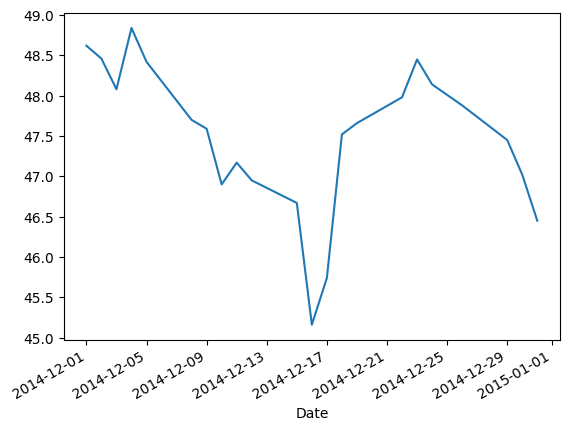

In [415]:
omh.MSFT.plot();

Цены акций Microsoft и Apple на одном графике:

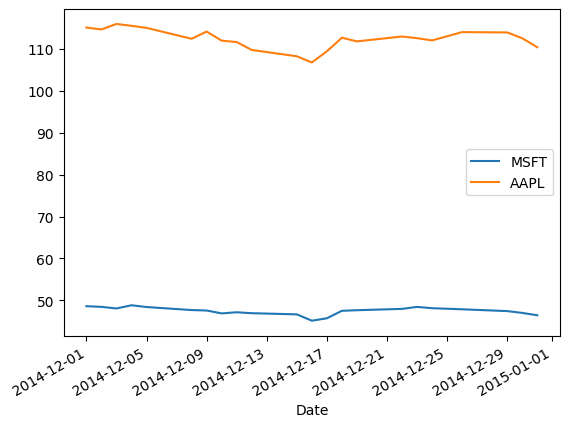

In [416]:
omh.plot();

Так как цены акций имеют разный масштаб, можно выполнить нормализацию цен:

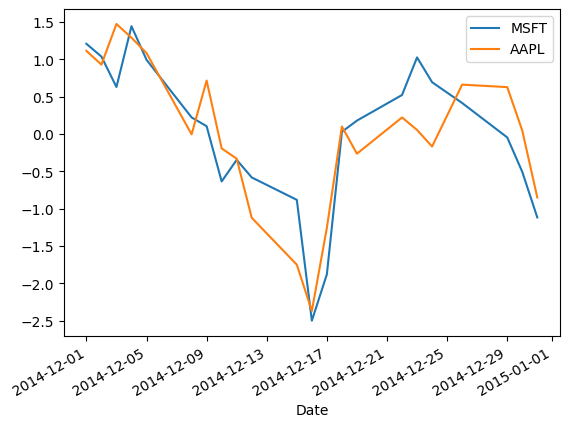

In [417]:
omh_copy =  (omh - omh.mean())/omh.std()
omh_copy.plot();

Можно задать желаемые размеры графика:

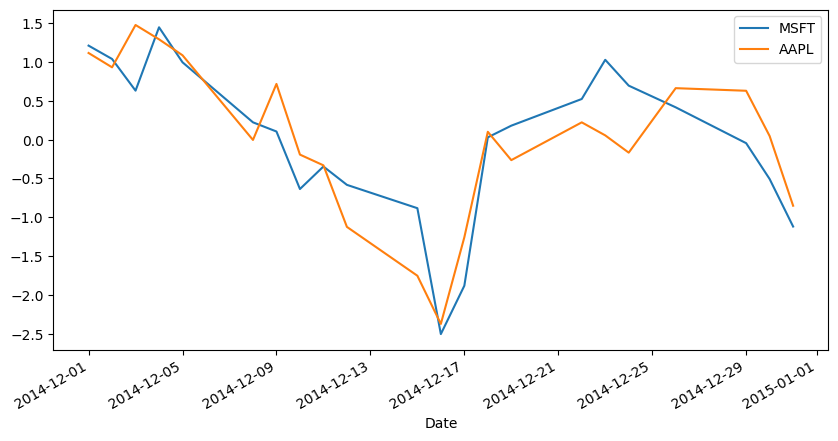

In [418]:
omh_copy.plot(figsize=(10, 5));

Заголовок может быть задан при помощи параметра `title` метода `plot()`, а подписи осей `x` и `y` могут быть заданы обращением к Matplotlib:

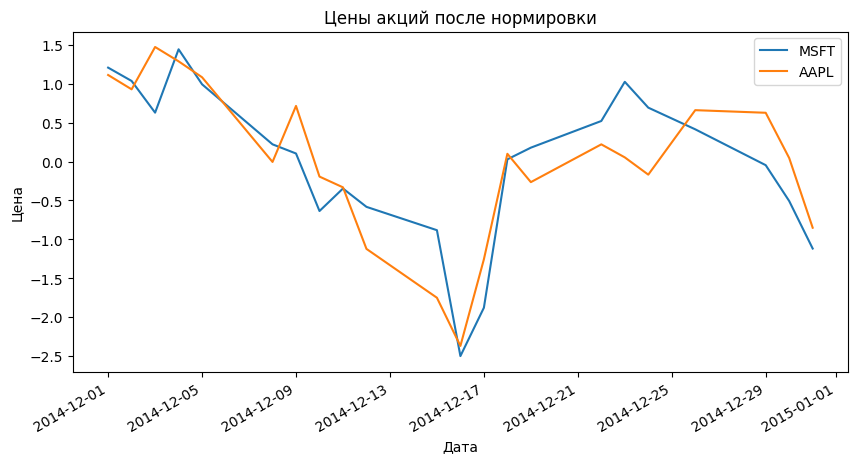

In [278]:
import matplotlib.pyplot as plt

omh_copy.plot(title='Цены акций после нормировки', figsize=(10, 5))
plt.xlabel('Дата')
plt.ylabel('Цена');

Можно изменить элементы легенды, соответствующие именам столбцов датафрейма:

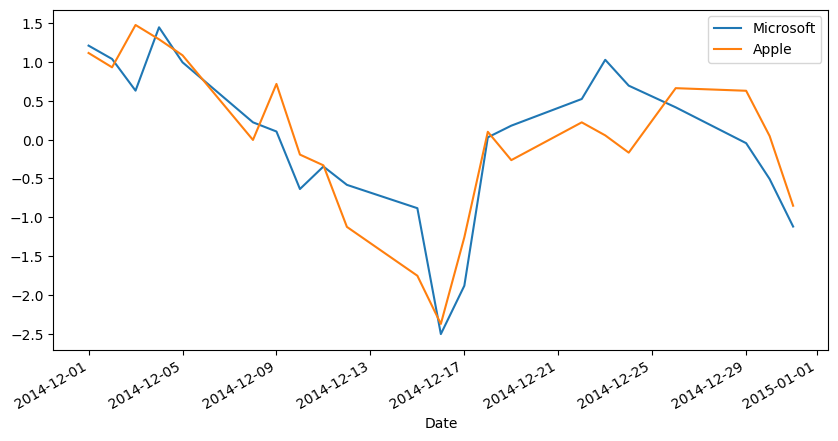

In [419]:
ax = omh_copy.plot(figsize=(10, 5))
ax.legend(['Microsoft', 'Apple']);

Можно изменить расположение легенды:

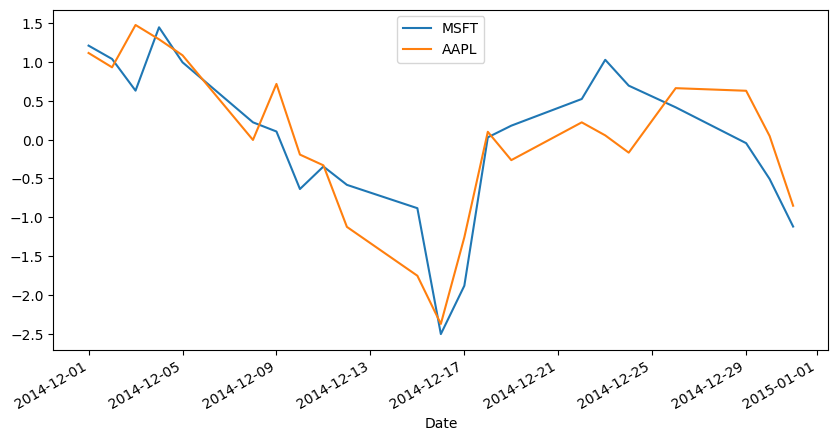

In [420]:
ax = omh_copy.plot(figsize=(10, 5))
ax.legend(loc='upper center');

Можно вообще отключить легенду:

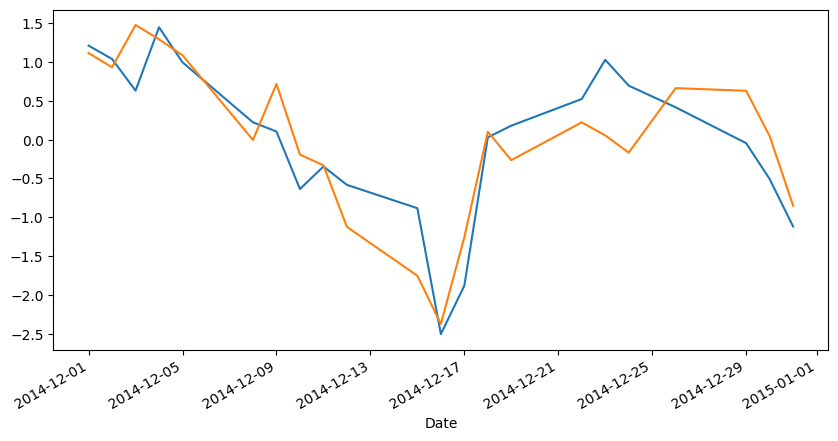

In [421]:
omh_copy.plot(figsize=(10, 5), legend=False);

Изменим цвета линий графика:

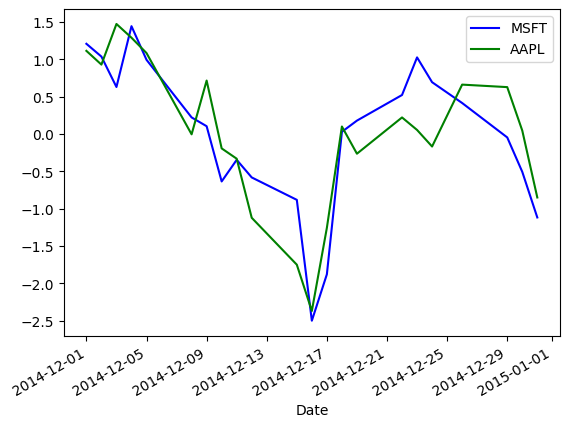

In [422]:
omh_copy.plot(style={'MSFT': 'b', 'AAPL': 'g'});

Используем различные стили линий и увеличим толщину линий:

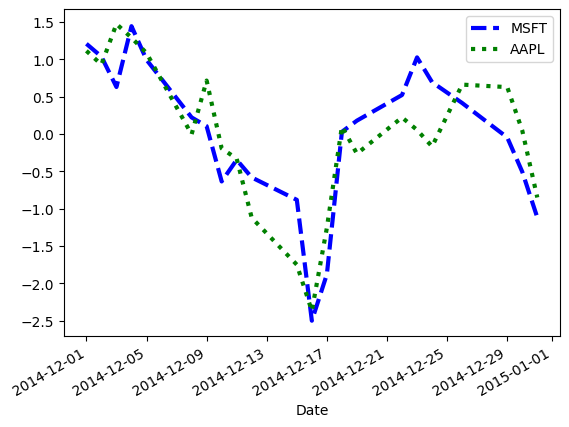

In [423]:
omh_copy.plot(style={'MSFT': 'b--', 'AAPL': 'g:'}, lw=3);

Можно добавить маркеры линий:

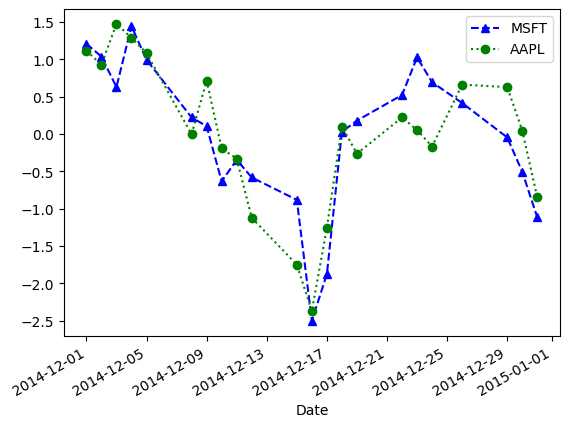

In [424]:
omh_copy.plot(style={'MSFT': 'b--^', 'AAPL': 'g:o'});

Из Pandas можно нарисовать различные виды графиков.

* столбчатая диаграмма (bar)

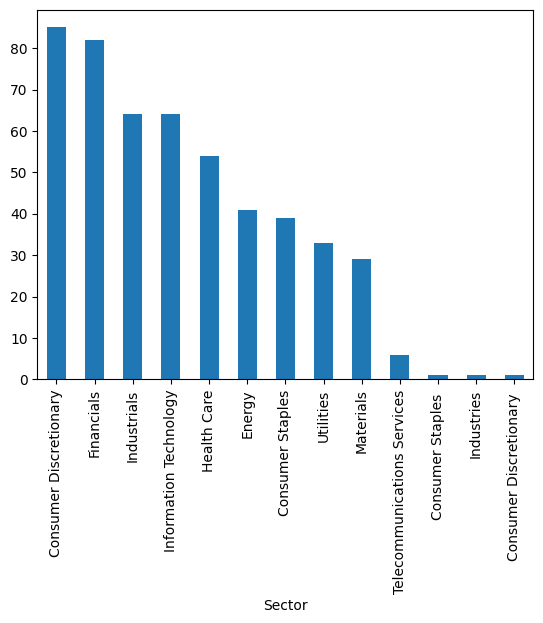

In [425]:
s = sp500.Sector.value_counts()
s.plot(kind='bar');

Сократим данные для визуализации, отбросив, в частности, малочисленные сектора:

In [426]:
small_sectors = s[-4:].index.values

Вычислим квантили 95%:

In [427]:
sp500.drop(columns=['Sector']).quantile(0.95)

,0.95
Price,183.8595
Dividend Yield,4.4370
Book Value,66.2591
Market Cap,134.8750


Создадим усеченную копию данных так:

In [428]:
idx = (~sp500.Sector.isin(small_sectors)) \
    & (sp500.Price < 184) \
    & (sp500['Book Value'] < 66) \
    & (sp500['Market Cap'] < 134) \
    & (sp500['Dividend Yield'] < 4.5)

sp500_cut = sp500.loc[idx].copy()
sp500_cut.shape

(348, 5)

Построим столбчатую диаграмму для средних и медиан:

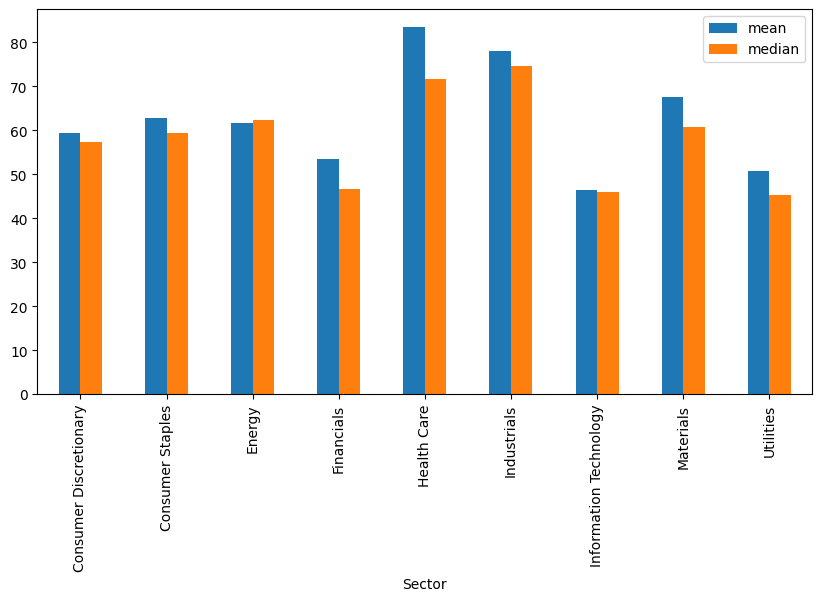

In [429]:
df = sp500_cut.groupby('Sector').Price.agg(['mean', 'median'])
df.plot(kind='bar', figsize=(10, 5));

Пример вертикально состыкованной столбчатой диаграммы:

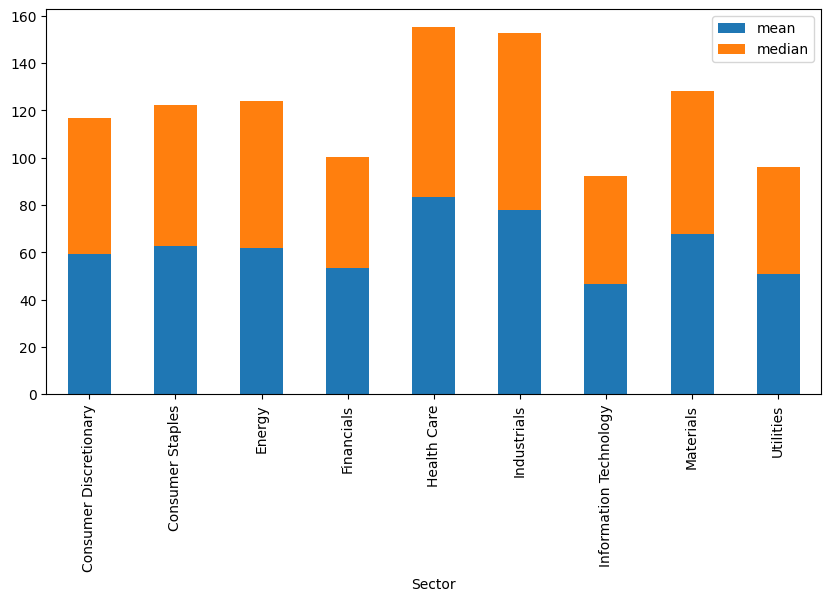

In [430]:
df.plot(kind='bar', stacked=True, figsize=(10, 5));

Горизонтально состыкованная столбчатая диаграмма имеет вид:

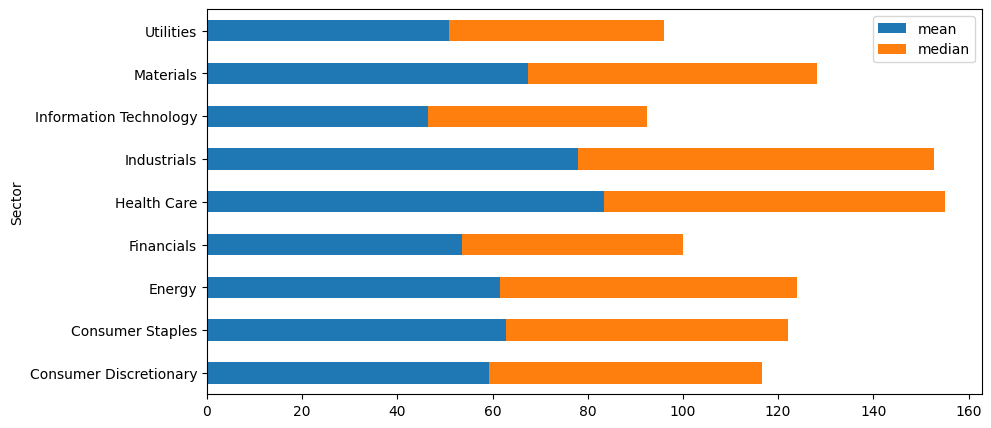

In [431]:
df.plot(kind='barh', stacked=True, figsize=(10, 5));

* гистограмма

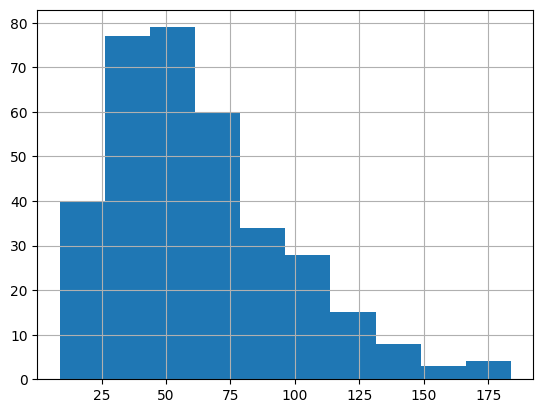

In [432]:
sp500_cut.Price.hist();

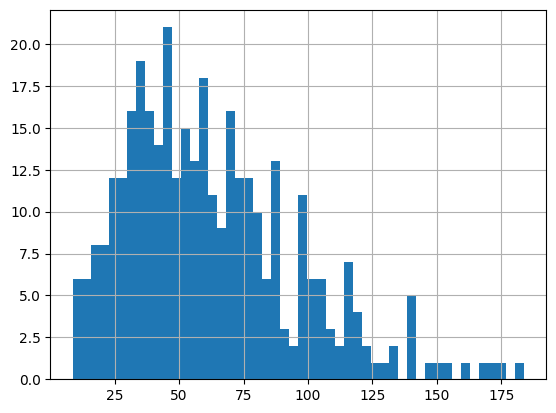

In [433]:
sp500_cut.Price.hist(bins = 50);

Для датафрейма получается 4 гистограммы:

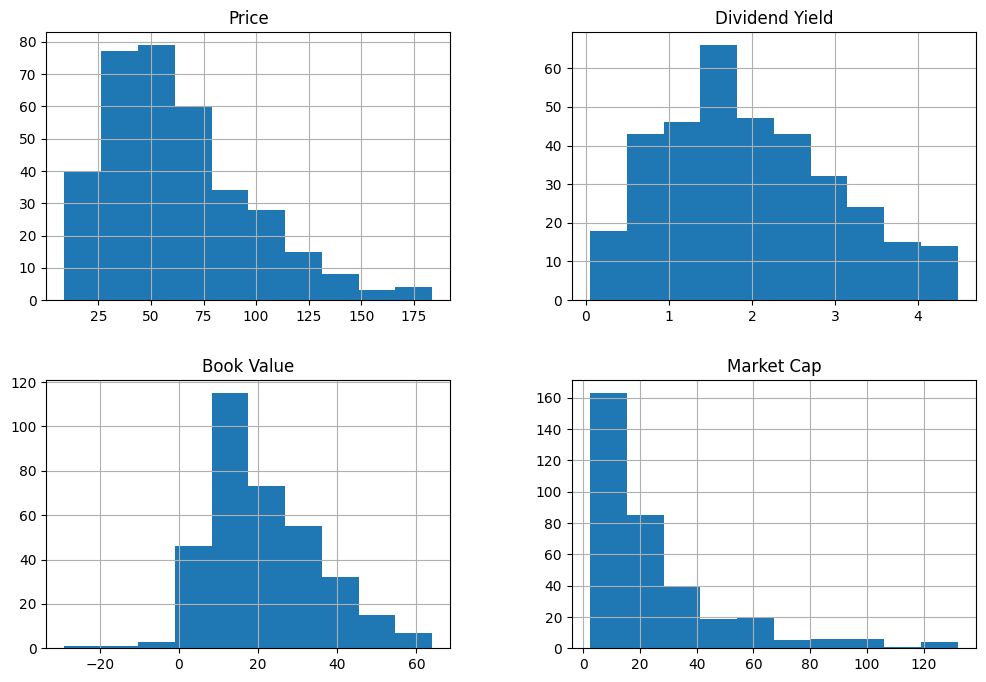

In [434]:
sp500_cut.hist(figsize=(12,8));

Можно наложить несколько гистограмм при помощи модуля pyplot:

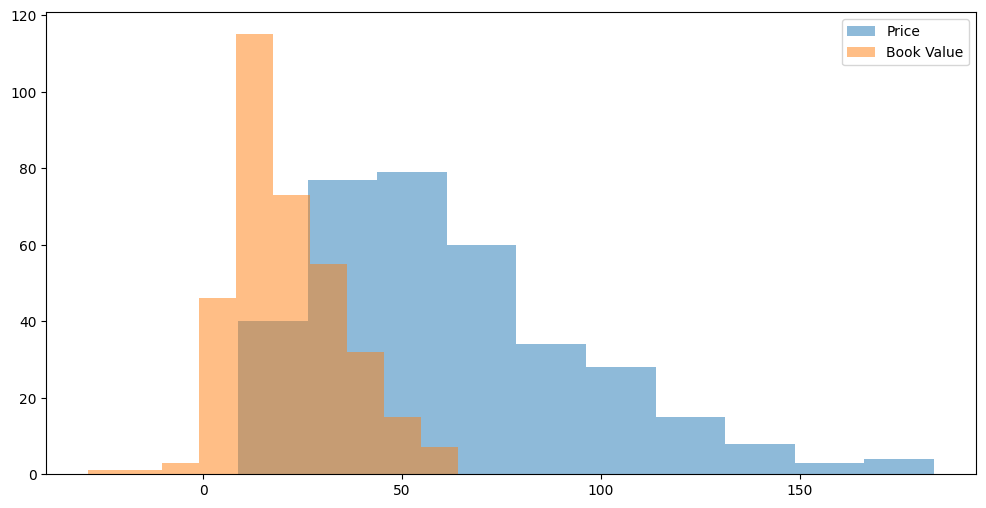

In [435]:
plt.figure(figsize=(12, 6))
plt.hist(sp500_cut.Price, alpha=0.5, label='Price')
plt.hist(sp500_cut['Book Value'], alpha=0.5, label='Book Value')
plt.legend(loc='upper right');

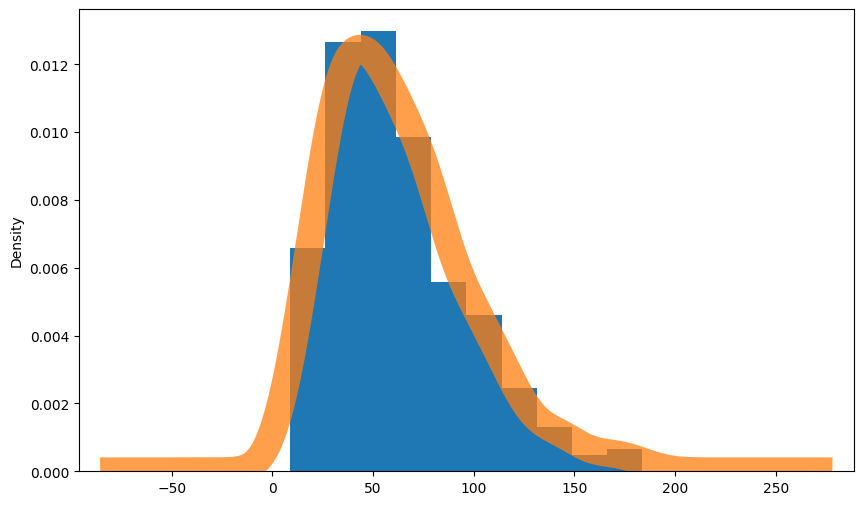

In [436]:
s = sp500_cut.Price
s.hist(density=True)
s.plot(kind='kde', lw=20, alpha=0.75, figsize=(10,6));

* диаграмма размаха (boxplot)

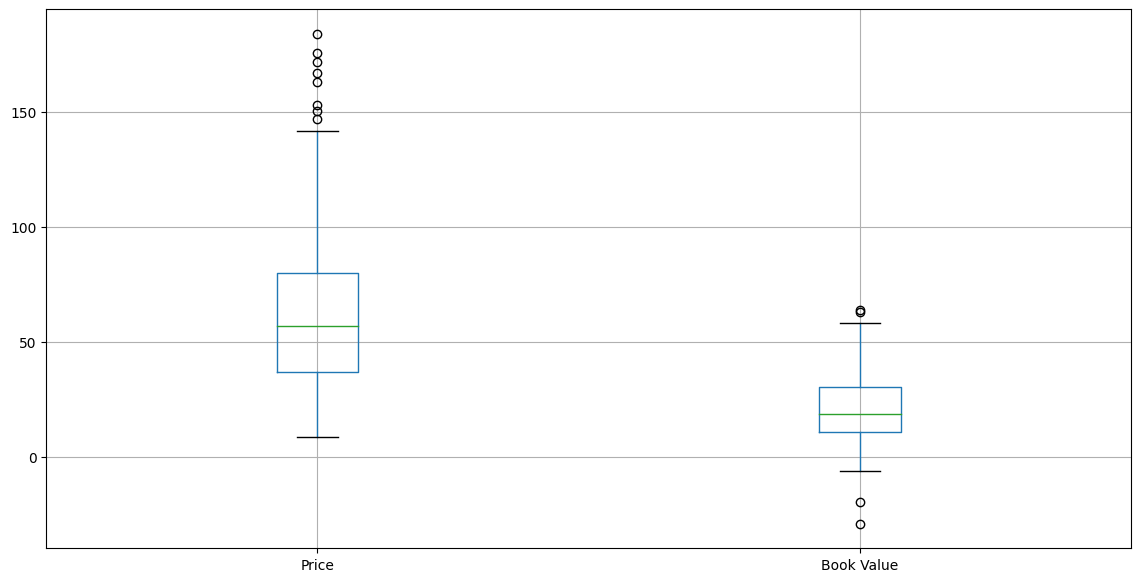

In [437]:
sp500_cut[['Price','Book Value']].boxplot(figsize = (14, 7));

* диаграмма рассеяния (scatter plot)

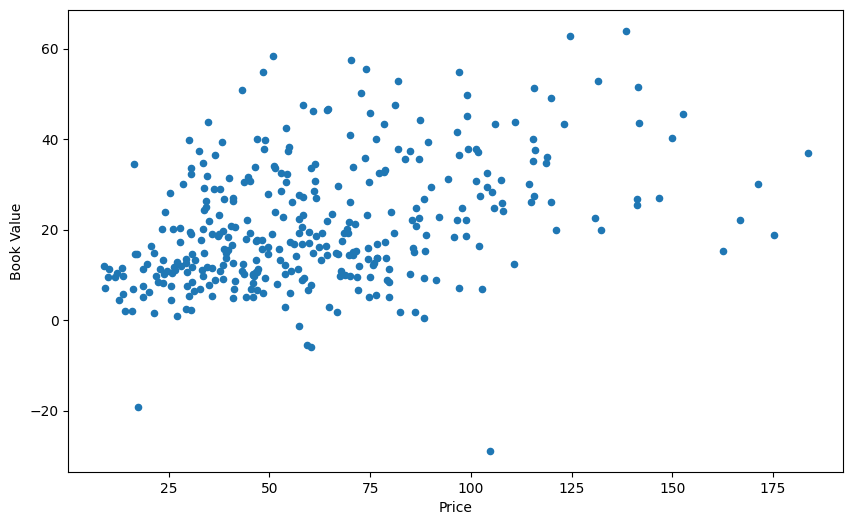

In [438]:
sp500_cut.plot(kind='scatter',x='Price',y='Book Value',figsize=(10,6));

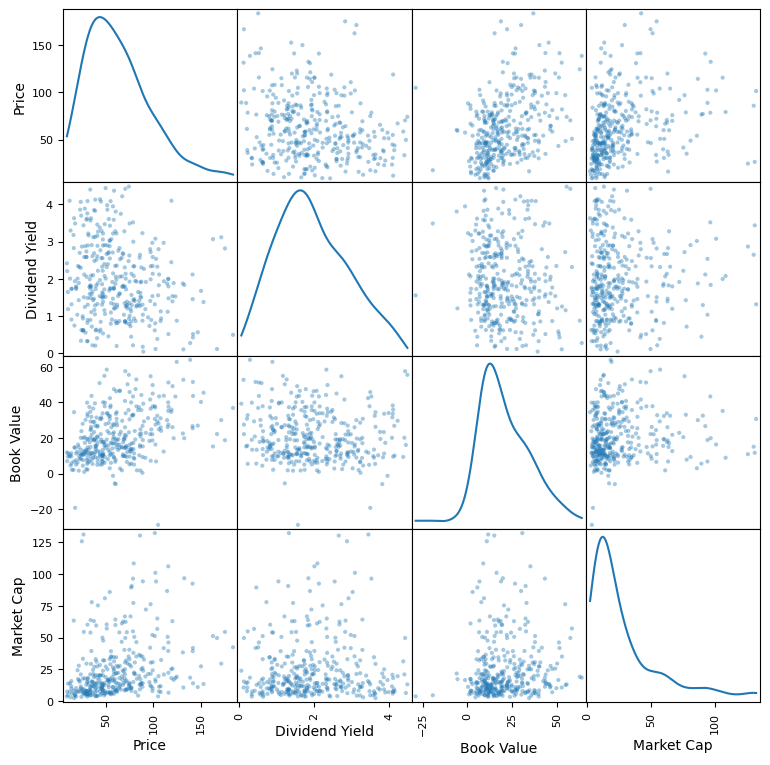

In [439]:
from pandas.plotting import scatter_matrix
scatter_matrix(sp500_cut, alpha=0.4, figsize=(9, 9), diagonal='kde');

* тепловая карта (heat map)

In [443]:
corr_matrix = sp500_cut.drop(columns=['Sector']).corr()
corr_matrix

,Price,Dividend Yield,Book Value,Market Cap
Price,1.000000,-0.198063,0.400478,0.300704
Dividend Yield,-0.198063,1.000000,-0.094121,0.019838
Book Value,0.400478,-0.094121,1.000000,0.069702
Market Cap,0.300704,0.019838,0.069702,1.000000


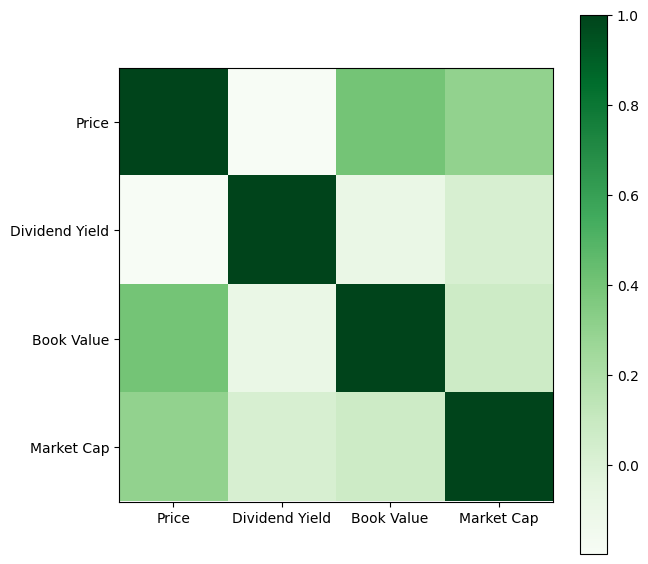

In [441]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);

Приведем пример визуализации набора данных со сниженной размерностью (разными цветами) при помощи Matplotlib:

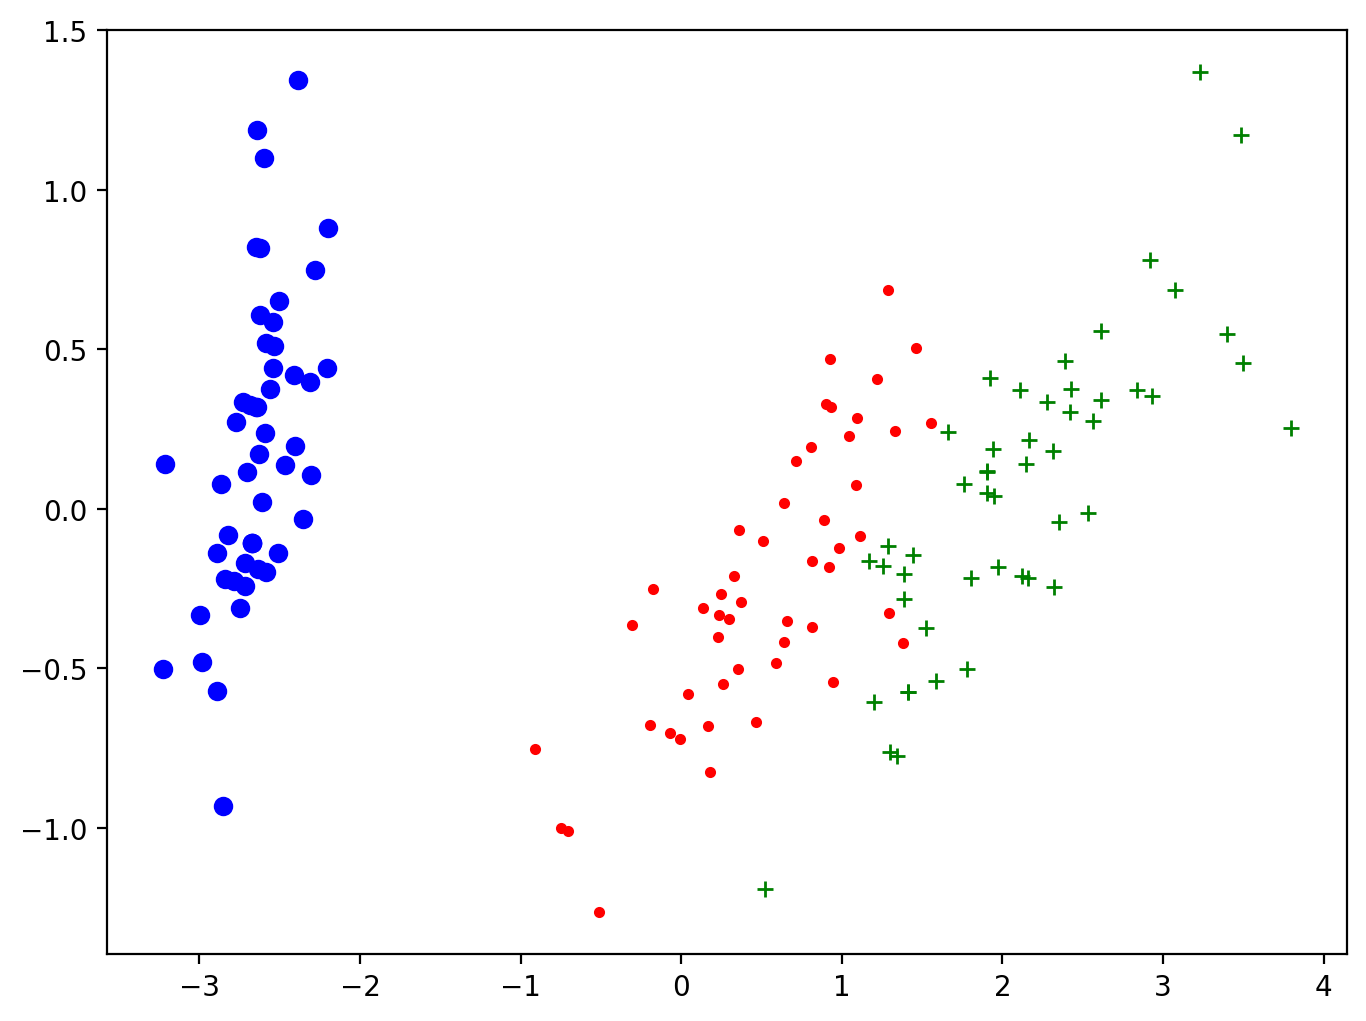

In [442]:
data = np.genfromtxt( "iris.csv", delimiter=",", usecols=(0,1,2,3) )
target = np.genfromtxt( "iris.csv", delimiter=",", usecols=(4), dtype=str )

pca = PCA(n_components=2)
pcad = pca.fit_transform( data )

plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(pcad[target=="Iris-setosa",0],
         pcad[target=="Iris-setosa",1],"bo")
plt.plot(pcad[target=="Iris-versicolor",0],
         pcad[target=="Iris-versicolor",1],"r.")
plt.plot(pcad[target=="Iris-virginica",0],
         pcad[target=="Iris-virginica",1],"g+");

### Задание на лабораторную работу №1

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).

2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.

4. При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`.

5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map).

6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 97.5%.

8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.
